In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("vgchartz-2024.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
# Remove rows with missing total_sales
df_clean = df.dropna(subset=["total_sales"]).copy()

# Drop 'img' and 'last_update' columns as they are not important
df_clean = df_clean.drop(columns=["img", "last_update"])

# Convert date column to datetime format
df_clean["release_date"] = pd.to_datetime(df_clean["release_date"], errors="coerce")

# Fill missing values in 'developer' column with 'Unknown'
df_clean["developer"] = df_clean["developer"].fillna("Unknown")

# Display the number of missing values after cleaning
df_clean.isna().sum().sort_values(ascending=False)

critic_score    14796
jp_sales        12196
na_sales         6285
pal_sales        6098
other_sales      3794
release_date       90
title               0
console             0
genre               0
publisher           0
developer           0
total_sales         0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


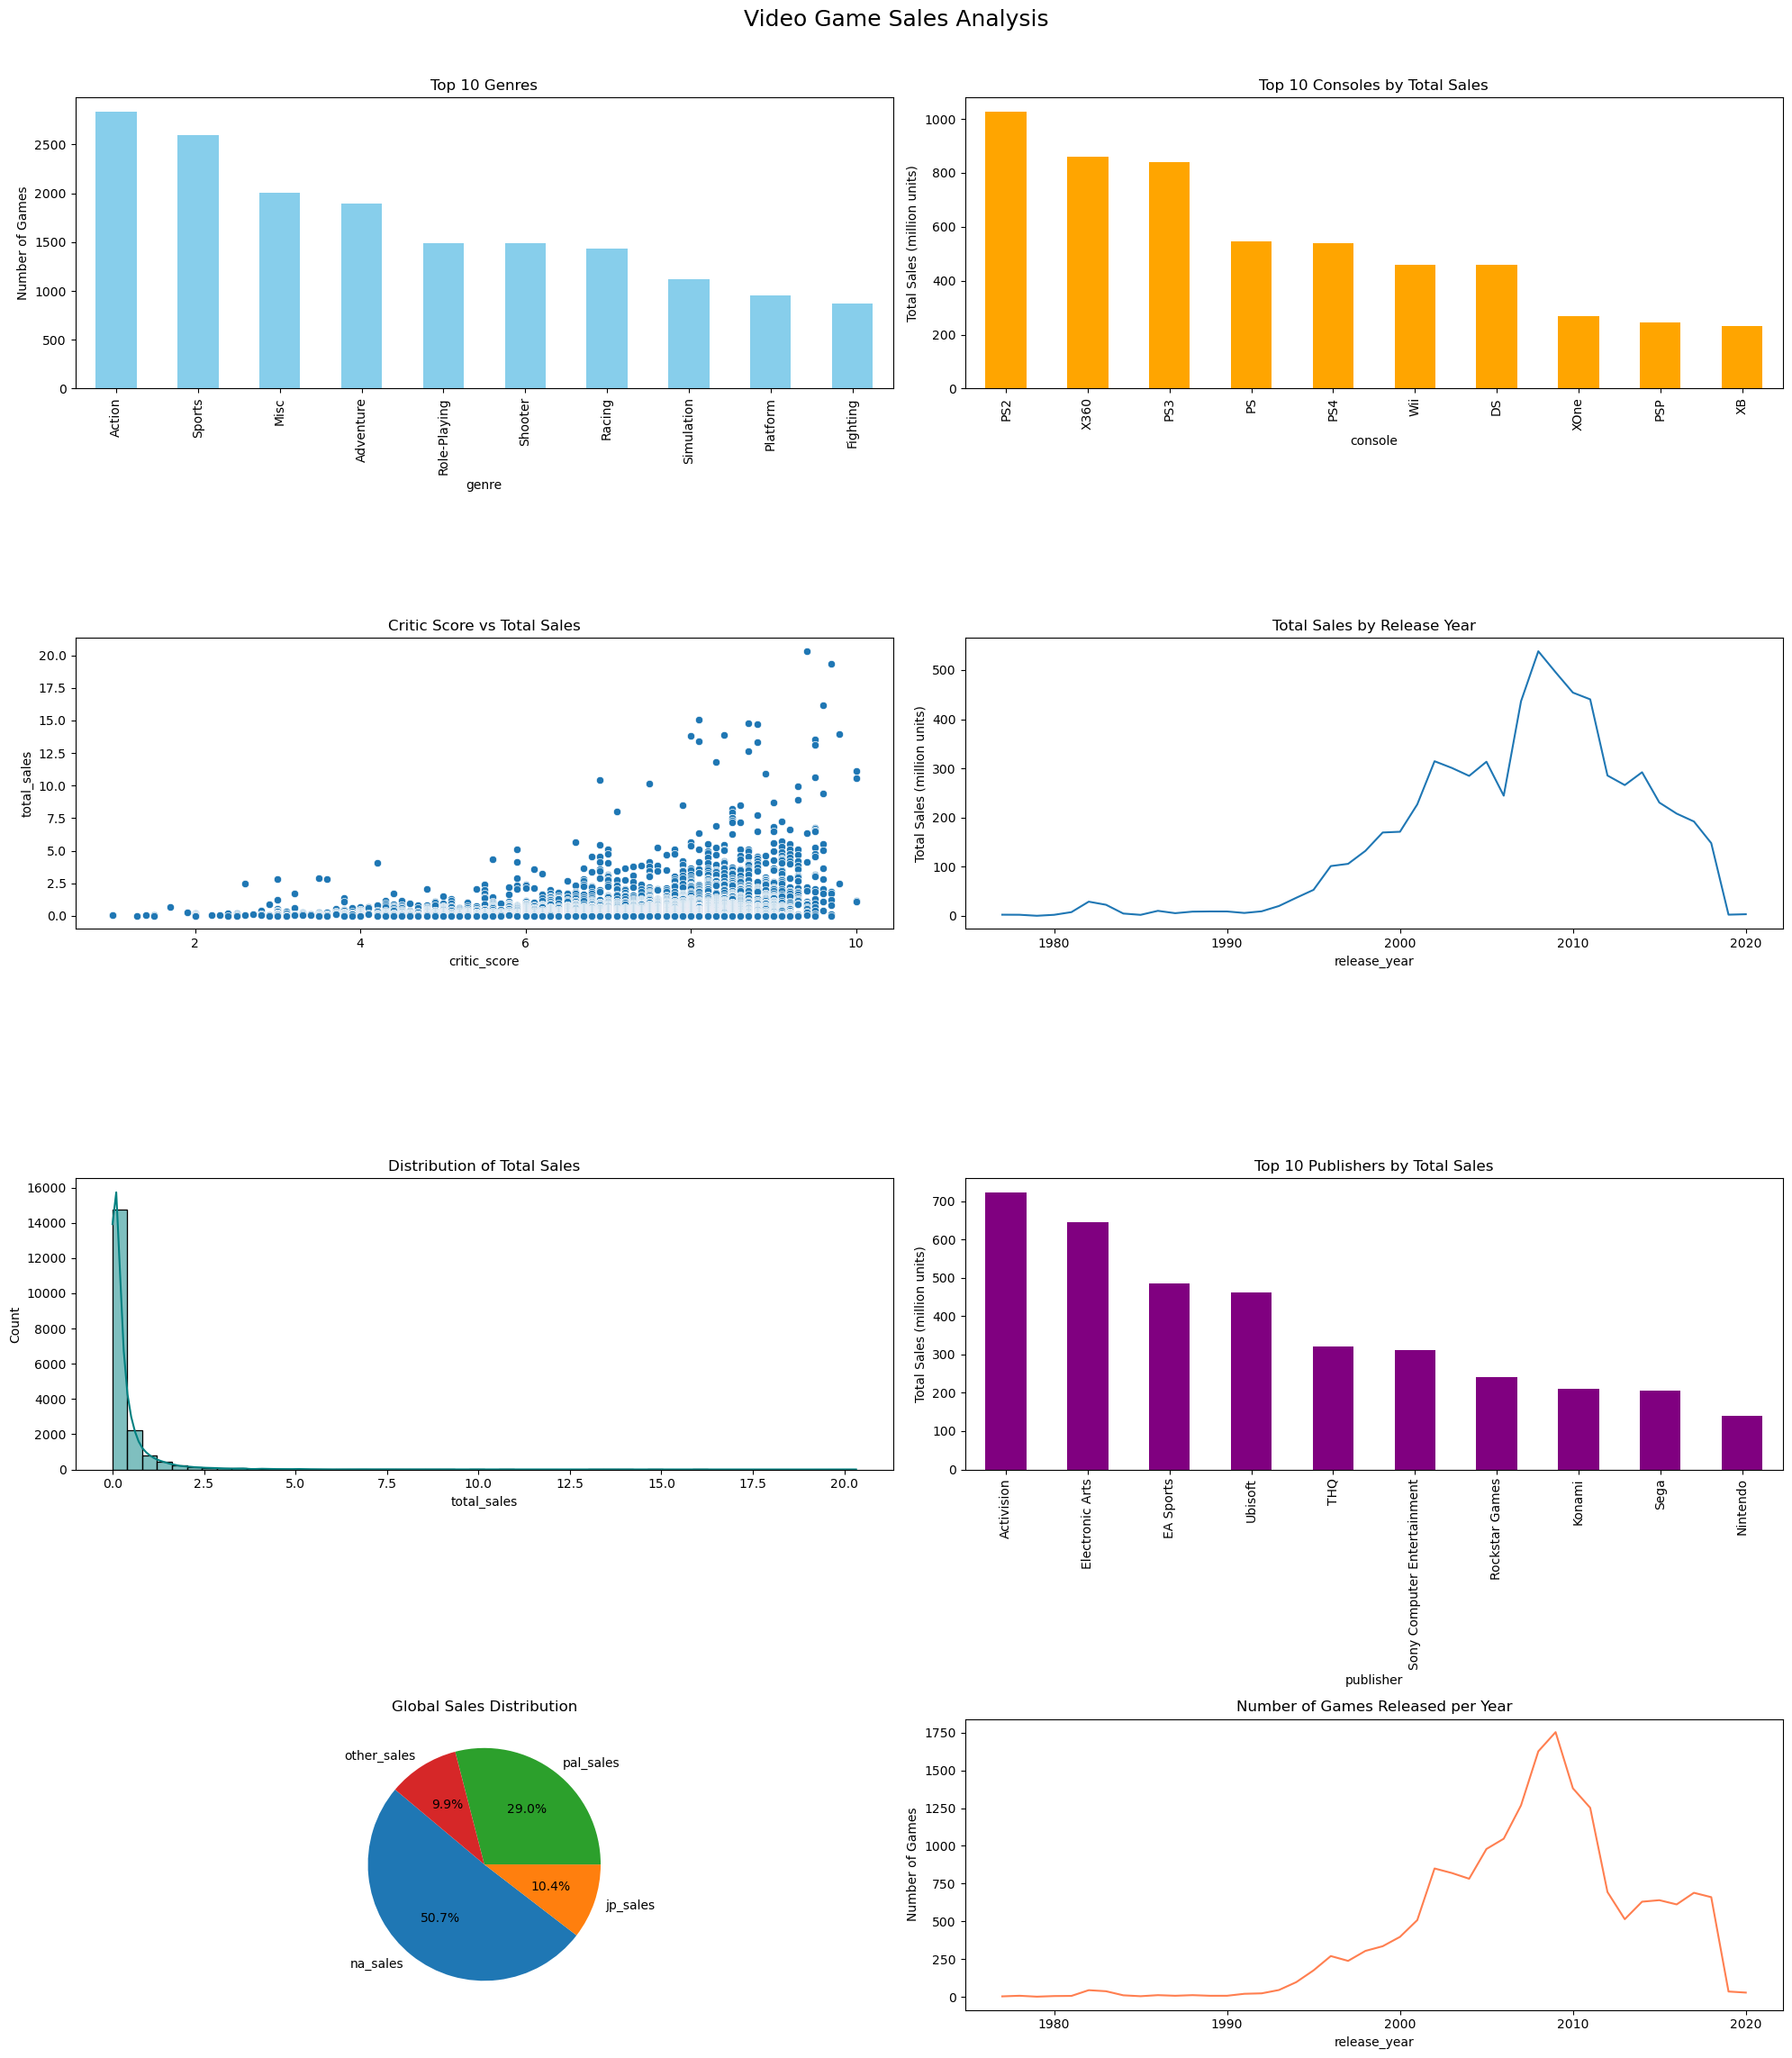

In [4]:
# Ensure release_date is in datetime format and extract release year
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')
df_clean['release_year'] = df_clean['release_date'].dt.year

# Prepare additional visualizations
fig, axes = plt.subplots(4, 2, figsize=(20, 24))
fig.suptitle('Video Game Sales Analysis', fontsize=18)

# 1. Top 10 Genres
genre_counts = df_clean['genre'].value_counts().head(10)
genre_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Top 10 Genres')
axes[0, 0].set_ylabel("Number of Games")

# 2. Top Consoles by Total Sales
console_sales = df_clean.groupby("console")["total_sales"].sum().sort_values(ascending=False).head(10)
console_sales.plot(kind='bar', ax=axes[0, 1], color='orange', title='Top 10 Consoles by Total Sales')
axes[0, 1].set_ylabel("Total Sales (million units)")

# 3. Correlation between Critic Score and Total Sales
score_sales = df_clean[['critic_score', 'total_sales']].dropna()
sns.scatterplot(data=score_sales, x='critic_score', y='total_sales', ax=axes[1, 0])
axes[1, 0].set_title("Critic Score vs Total Sales")

# 4. Annual Sales Trend
sales_by_year = df_clean.groupby('release_year')["total_sales"].sum().dropna()
sales_by_year.plot(ax=axes[1, 1], title='Total Sales by Release Year')
axes[1, 1].set_ylabel("Total Sales (million units)")

# 5. Distribution of Total Sales
sns.histplot(df_clean['total_sales'], bins=50, kde=True, ax=axes[2, 0], color='teal')
axes[2, 0].set_title("Distribution of Total Sales")

# 6. Top 10 Publishers by Total Sales
publisher_sales = df_clean.groupby("publisher")["total_sales"].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', ax=axes[2, 1], color='purple', title='Top 10 Publishers by Total Sales')
axes[2, 1].set_ylabel("Total Sales (million units)")

# 7. Sales Distribution by Region
region_sales = df_clean[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()
region_sales.plot(kind='pie', ax=axes[3, 0], autopct='%1.1f%%', startangle=140, title='Global Sales Distribution')
axes[3, 0].set_ylabel("")

# 8. Number of Games Released per Year
release_counts = df_clean['release_year'].value_counts().sort_index()
release_counts.plot(ax=axes[3, 1], title='Number of Games Released per Year', color='coral')
axes[3, 1].set_ylabel("Number of Games")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()